In [1]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Using TensorFlow backend.


In [0]:
# 此函數會幫我們把多張影像畫成一張多宮格圖
def img_combine(img, ncols=8, size=1, path=False):
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len(img)
    nrows = int(ceil(nimg/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip(np.arange(nrows), axes):
            nth=r
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                
            ax.set_axis_off()
    elif nrows == 1:
        for c, ax in zip(np.arange(ncols), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(ncols), row):
                nth=r*ncols+c
                if nth < nimg:
                    ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                ax.set_axis_off()
    plt.show()

In [0]:
# 讀取 Cifar-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

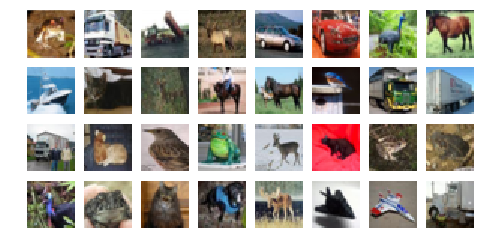

In [4]:
# 取前 32 張圖片做視覺化
images = x_train[:32]
img_combine(images)

In [0]:
# 建立 ImageDataGenerator，並指定我們要做資料增強的數值範圍
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

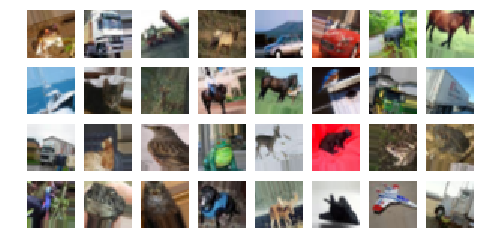

In [6]:
# 注意！！ ImageDataGenerator 是一個 Generator (生成器)! 對 Generator 不熟悉的同學請回到 Day098 做複習。
# 使用 .flow 後，就會對我們的影像進行增強，再 call next 取出 generator 的圖像。(shuffle=False 因為我們希望圖像的順序不要改變，方便觀察。實際訓練時預設是 shuffle=True) 
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int")) # 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int

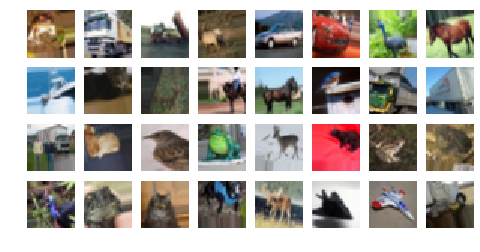

In [7]:
# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

## 作業

請使用 ImageDataGenerator 來進行 Cifar-10 資料集的訓練，並觀察不同的圖像增強方法是否會顯著影響訓練結果

In [0]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam, RMSprop
import os

In [0]:
def preproc_x(x, flatten = True):
  x = x / 255.0
  if flatten:
    x = x.reshape((len(x),-1))
  return x

def preproc_y(y, num_classes = 10):
  if y.shape[-1] == 1:
    y = keras.utils.to_categorical(y,num_classes)
    
  return y

In [10]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

train_x = preproc_x(train_x, False)
test_x = preproc_x(test_x, False)
train_y = preproc_y(train_y)
test_y = preproc_y(test_y)

print(f' train_x shape : {train_x.shape}')
print(f' train_y shape : {train_y.shape}')
print(f' test_x shape : {test_x.shape}')
print(f' test_y shape : {test_y.shape}')

 train_x shape : (50000, 32, 32, 3)
 train_y shape : (50000, 10)
 test_x shape : (10000, 32, 32, 3)
 test_y shape : (10000, 10)


In [0]:
def build_CNN(input_shape, output_units = 10):
  
  
  input_layer = keras.layers.Input(input_shape)
  
  x = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same')(input_layer)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size = (2,2))(x)
  x = Dropout(0.25)(x)
  
  x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size = (2,2))(x)
  x = Dropout(0.25)(x)
  
  x = Conv2D(filters = 128, kernel_size = (3,3), padding = 'same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(filters = 128, kernel_size = (3,3), padding = 'same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size = (2,2))(x)
  x = Dropout(0.25)(x)
  
  x = Flatten()(x)
  x = Dense(units = 512)(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Dropout(0.25)(x)
  
  x = Dense(units = 256)(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Dropout(0.25)(x)
  
  x = Dense(units = 128)(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Dropout(0.25)(x)
  
  output_layer = Dense(units = output_units, activation = 'softmax')(x)
  
  model = keras.models.Model( inputs = [input_layer], outputs = [output_layer])
  return model

In [0]:
def cifar_gen(image_arr, batch_size = 128):
    while True:
        for idx in range(0,  len(image_arr), batch_size):
            images = train_x[idx : idx + batch_size]
            labels = train_y[idx : idx + batch_size]
            
            yield images, labels

In [0]:
image_gen = ImageDataGenerator( rotation_range = 10,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    zoom_range = 0.1 )

In [0]:
def make_cifar_aug_gen(input_gen):
  for in_x, in_y in input_gen:
    x = image_gen.flow(in_x * 255.0, batch_size = in_x.shape[0], shuffle = False)
    y = in_y
    
    yield next(x)/255.0, y

In [15]:
data_gen = cifar_gen(train_x)
aug_gen = make_cifar_aug_gen(data_gen)

_x, _y = next(aug_gen)
print(_x.shape)
print(_y.shape)

(128, 32, 32, 3)
(128, 10)


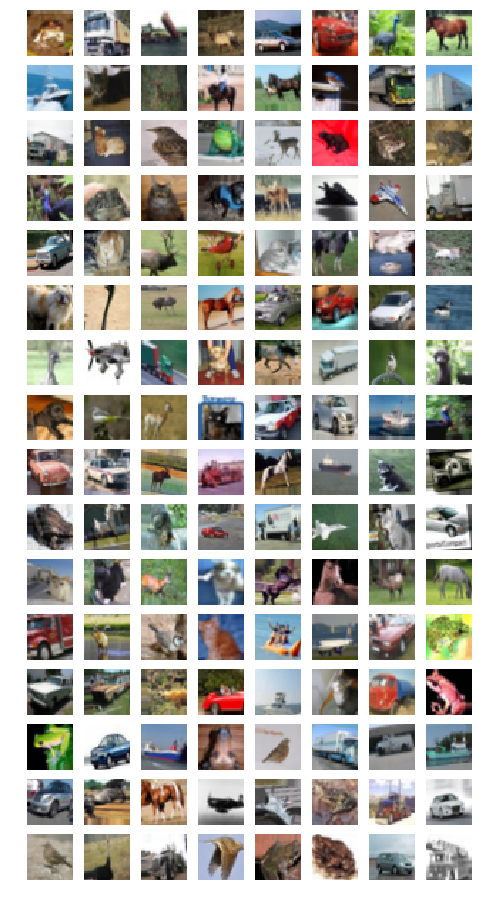

In [16]:
img_combine(_x)

In [17]:
cnn_model = build_CNN(train_x.shape[1:])
#sgd = keras.optimizers.SGD(lr = 0.001, momentum = 0.95, nesterov = True)
adam = keras.optimizers.Adam(lr = 0.001)
cnn_model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = adam)
cnn_model.summary()

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, min_lr = 1e-6)

W0812 15:24:21.013493 139799299446656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 15:24:21.033620 139799299446656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 15:24:21.039954 139799299446656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0812 15:24:21.141580 139799299446656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0812 15:24:21.143201 1397992994

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
__________

In [0]:
batch_size = 128
epochs = 50

In [19]:
history = cnn_model.fit_generator(aug_gen, steps_per_epoch = train_x.shape[0] // batch_size,
                                  epochs = epochs, validation_data = (test_x, test_y), callbacks = [reduce_lr] )

W0812 15:24:23.065647 139799299446656 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
390/390 [==============================] - 44s 112ms/step - loss: 1.6462 - acc: 0.4000 - val_loss: 2.0660 - val_acc: 0.3949
Epoch 2/50
390/390 [==============================] - 38s 97ms/step - loss: 1.2379 - acc: 0.5558 - val_loss: 1.4012 - val_acc: 0.5316
Epoch 3/50
390/390 [==============================] - 38s 96ms/step - loss: 1.0504 - acc: 0.6296 - val_loss: 1.2689 - val_acc: 0.5869
Epoch 4/50
390/390 [==============================] - 40s 103ms/step - loss: 0.9381 - acc: 0.6705 - val_loss: 1.2852 - val_acc: 0.5844
Epoch 5/50
390/390 [==============================] - 40s 103ms/step - loss: 0.8576 - acc: 0.7003 - val_loss: 0.9458 - val_acc: 0.6828
Epoch 6/50
390/390 [==============================] - 39s 100ms/step - loss: 0.8029 - acc: 0.7212 - val_loss: 1.1767 - val_acc: 0.6163
Epoch 7/50
390/390 [==============================] - 38s 97ms/step - loss: 0.7575 - acc: 0.7386 - val_loss: 1.0469 - val_acc: 0.6693
Epoch 8/50
390/390 [==============================] - 37s 

10000/10000 [==============================] - 2s 232us/step
cnn loss : 0.4743381511926651
cnn acc : 0.8553


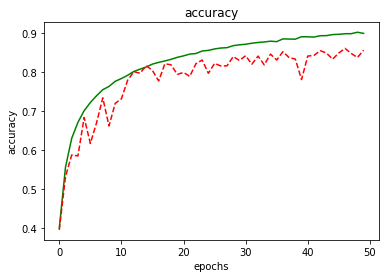

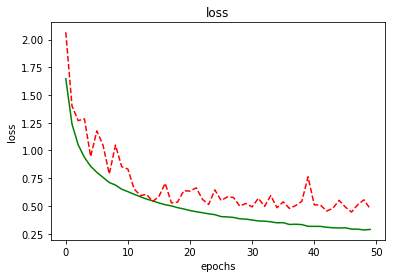

In [20]:
score = cnn_model.evaluate(test_x,test_y)
print(f'cnn loss : {score[0]}')
print(f'cnn acc : {score[1]}')

import matplotlib.pyplot as plt

plt.plot(history.history['acc'], '-', label = 'train_acc', color = 'g')
plt.plot(history.history['val_acc'],'--', label = 'valid_acc', color = 'r')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

plt.plot(history.history['loss'], '-', label = 'train_loss', color = 'g')
plt.plot(history.history['val_loss'],'--', label = 'valid_loss', color = 'r')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()